[*********************100%***********************]  6 of 6 completed


Optimal Weights:
AAPL: 27.94%
MSFT: 3.67%
GOOGL: 3.17%
TSLA: 1.46%
AMZN: 41.58%
NVDA: 22.18%

 Expected Annual Return: 59.41%
 Annual Volatility (Risk): 38.70%
⚖️ Sharpe Ratio: 1.54


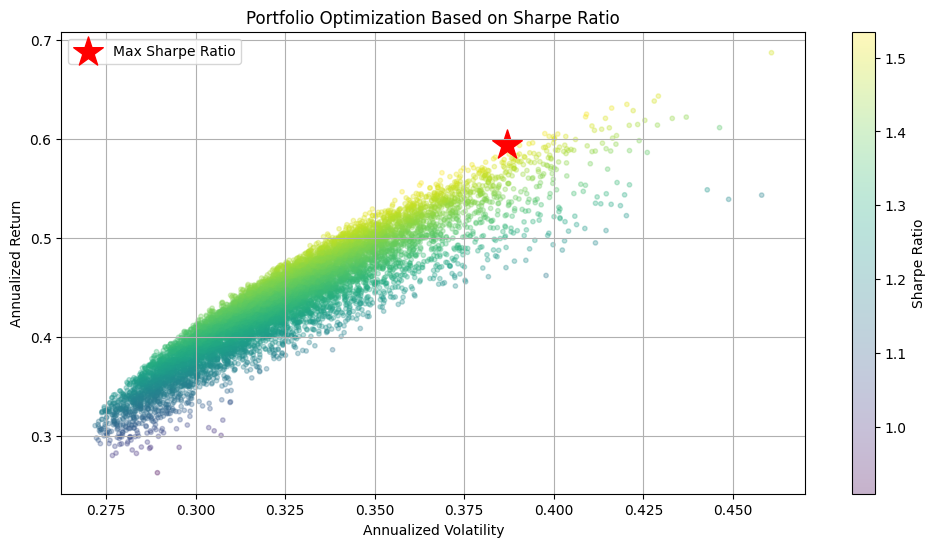

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Portfolio Optimization Using Sharpe Ratio (Tech Stocks)

# Step 1: Install yfinance
!pip install yfinance --quiet

# Step 2: Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 3: Define stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA']

# Step 4: Download historical price data (5 years)
data = yf.download(tickers, start="2019-01-01", end="2024-12-31", auto_adjust=False)['Adj Close']
data.dropna(inplace=True)
data.tail()

# Step 5: Calculate daily returns
returns = data.pct_change().dropna()

# Step 6: Simulate 10,000 random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # Portfolio return and volatility
    portfolio_return = np.sum(returns.mean() * weights) * 252  # annualized
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe Ratio (risk-free rate = 0)
    sharpe_ratio = portfolio_return / portfolio_std_dev

    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = sharpe_ratio

    # Step 7: Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_weights = weights_record[max_sharpe_idx]

print("Optimal Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {max_sharpe_weights[i]:.2%}")

print(f"\n Expected Annual Return: {results[0,max_sharpe_idx]:.2%}")
print(f" Annual Volatility (Risk): {results[1,max_sharpe_idx]:.2%}")
print(f"⚖️ Sharpe Ratio: {results[2,max_sharpe_idx]:.2f}")

# Step 8: Plot all portfolios
plt.figure(figsize=(12,6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results[1,max_sharpe_idx], results[0,max_sharpe_idx], color='red', marker='*', s=500, label='Max Sharpe Ratio')
plt.title('Portfolio Optimization Based on Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

readme_text = """
# Portfolio Optimization using Sharpe Ratio (Tech Stocks)

## Overview

This project demonstrates how to optimize a stock portfolio using the **Sharpe Ratio**. We simulate 10,000 random portfolios of major US tech stocks and identify the one with the best return-to-risk balance.

## Data Source

- Yahoo Finance (`yfinance`)
- Stocks used: AAPL, MSFT, GOOGL, TSLA, AMZN, NVDA
- Date range: 2019-01-01 to 2024-12-31

## Tools Used

- Python
- pandas, numpy, matplotlib
- scipy.optimize
- yfinance

## Process

- Download historical data
- Calculate returns
- Simulate random portfolios
- Calculate returns, risk, and Sharpe ratio
- Visualize portfolios and find the optimal one

## Output

- Optimal portfolio weights
- Best Sharpe Ratio
- Portfolio return and volatility
- Scatter plot of 10,000 portfolios

## How to Run

1. Install dependencies with `pip install -r requirements.txt`
2. Run `Portfolio_Optimization.ipynb` in Jupyter or Colab

## Author

Vanessa Chinhengo
"""

# Save it as a file
with open("README.md", "w") as f:
    f.write(readme_text)

# Download it
from google.colab import files
files.download("README.md")

# Create requirements.txt file
requirements = """
pandas
numpy
matplotlib
scipy
yfinance
"""

# Save it to file
with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

# Download the file
from google.colab import files
files.download("requirements.txt")